### Este notebook debe lanzarse desde jupyter, no es compatible con VSCode

In [1]:
from arulespy.arules import Transactions, apriori, parameters
from arulespy.arulesViz import plot, inspectDT
import seaborn as sns
# brew install curl

In [2]:

# Load the dataset
df = sns.load_dataset('titanic')

# Preprocess: For simplicity, let's select a few columns and convert them to string type
df = df[['class', 'sex', 'alive']]
df = df.astype(str)

In [3]:
trans = Transactions.from_df(df)

trans.as_df()

,items,transactionID
1,"{class=Third,sex=male,alive=no}",0
2,"{class=First,sex=female,alive=yes}",1
3,"{class=Third,sex=female,alive=yes}",2
4,"{class=First,sex=female,alive=yes}",3
5,"{class=Third,sex=male,alive=no}",4
...,...,...
887,"{class=Second,sex=male,alive=no}",886
888,"{class=First,sex=female,alive=yes}",887
889,"{class=Third,sex=female,alive=no}",888
890,"{class=First,sex=male,alive=yes}",889


In [4]:
rules = apriori(trans,
                    parameter = parameters({"supp": 0.05, "conf": 0.6}), 
                    control = parameters({"verbose": False}))  

rules.as_df().round(2)

,LHS,RHS,support,confidence,coverage,lift,count
1,{},{alive=no},0.62,0.62,1.00,1.00,549
2,{},{sex=male},0.65,0.65,1.00,1.00,577
3,{class=First},{alive=yes},0.15,0.63,0.24,1.64,136
4,{sex=female},{alive=yes},0.26,0.74,0.35,1.93,233
5,{alive=yes},{sex=female},0.26,0.68,0.38,1.93,233
6,{class=Third},{alive=no},0.42,0.76,0.55,1.23,372
7,{alive=no},{class=Third},0.42,0.68,0.62,1.23,372
8,{class=Third},{sex=male},0.39,0.71,0.55,1.09,347
9,{sex=male},{class=Third},0.39,0.60,0.65,1.09,347
10,{alive=no},{sex=male},0.53,0.85,0.62,1.32,468


In [5]:
from rpy2 import situation

for row in situation.iter_info():
    print(row)

rpy2 version:
3.5.14
Python version:
3.11.5 (main, Aug 24 2023, 15:09:45) [Clang 14.0.3 (clang-1403.0.22.14.1)]
Looking for R's HOME:
    Environment variable R_HOME: /Library/Frameworks/R.framework/Resources
    Calling `R RHOME`: /Library/Frameworks/R.framework/Resources
    Environment variable R_LIBS_USER: None
R's value for LD_LIBRARY_PATH:
:
R version:
    In the PATH: R version 4.3.1 (2023-06-16) -- "Beagle Scouts"
    Loading R library from rpy2: OK
Additional directories to load R packages from:
None
C extension compilation:
  include:
  ['/Library/Frameworks/R.framework/Resources/include']
  libraries:
  ['pcre2-8', 'lzma', 'bz2', 'z', 'icucore', 'dl', 'm', 'iconv']
  library_dirs:
  ['/opt/R/arm64/lib', '/opt/R/arm64/lib']
  extra_compile_args:
  ['-std=c99']
  extra_link_args:
  ['-F/Library/Frameworks/R.framework/..', '-framework', 'R']
Directory for the R shared library:
lib
CFFI extension type
  Environment variable: RPY2_CFFI_MODE
  Value: CFFI_MODE.ANY
  ABI: PRESENT
 

In [6]:
# brew install --cask xquartz
import rpy2.robjects.lib.ggplot2 as gp
from rpy2.ipython.ggplot import image_png

/Users/lucianosanchez/dataenv3.11/lib/python3.11/site-packages/rpy2/robjects/lib/ggplot2.py:70: UserWarning: This was designed againt ggplot2 versions starting with 3.3. but you have 3.4.4
  warnings.warn(


R[write to console]: Además: 
R[write to console]: Warning messages:

R[write to console]: 1: Column(s) 1, 2, 3 not logical or factor. Applying default discretization (see '? discretizeDF'). 

R[write to console]: 2: 
R[write to console]: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
R[write to console]: 
 
R[write to console]:  library ‘/Users/lucianosanchez/Library/R/arm64/4.3/library’ contains no packages

R[write to console]: 3: 
R[write to console]: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
R[write to console]: 
 
R[write to console]:  library ‘/Users/lucianosanchez/Library/R/arm64/4.3/library’ contains no packages

R[write to console]: 4: 
R[write to console]: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
R[write to console]: 
 
R[write to console]:  library ‘/Users/lucianosanchez/Library/R/arm64/4.3/library’ contains no packages

R[write to console]: 5: 
R[write to consol

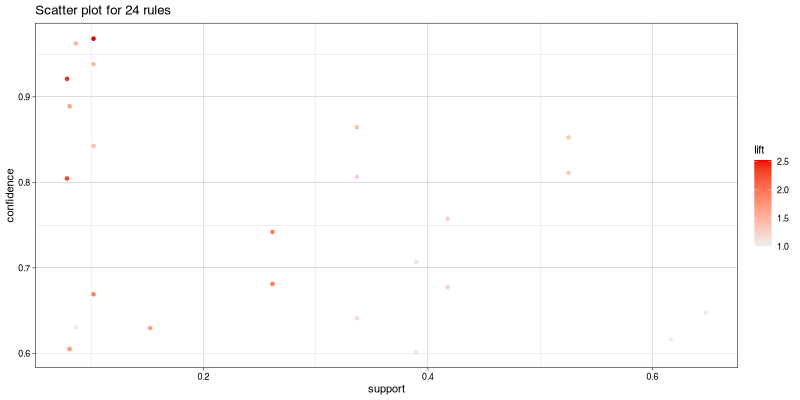

In [7]:
gg = plot(rules, method="scatter")
image_png(gg)

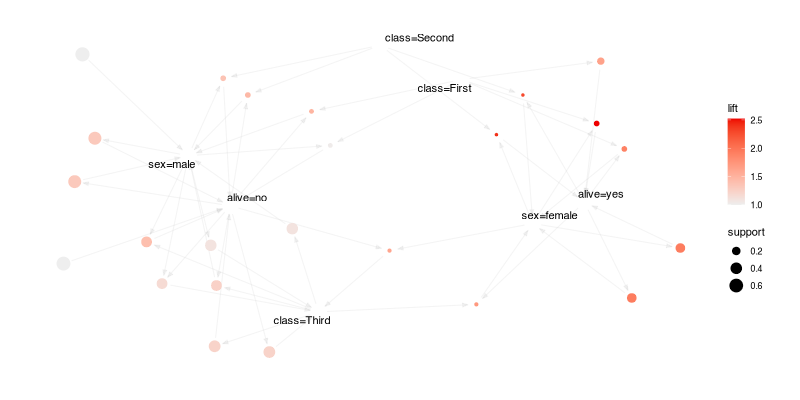

In [8]:
rules_20 = rules.sort(by = 'confidence')
gg = plot(rules_20, method="graph")
image_png(gg)

In [9]:
from IPython.display import IFrame

import rpy2.robjects.packages as packages
htmlwidgets = packages.importr('htmlwidgets')

In [10]:
# brew install pandoc
m = inspectDT(rules)
htmlwidgets.saveWidget(m, 'datatable.html')

IFrame("datatable.html", "100%", 600)

In [11]:
from IPython.display import IFrame
import rpy2.robjects.packages as packages
htmlwidgets = packages.importr('htmlwidgets')

m = plot(rules_20, method="graph", engine="htmlwidget")
htmlwidgets.saveWidget(m, "graph.html", selfcontained = True)
IFrame("graph.html", "100%", 800)

In [ ]:
from arulespy.arulesViz import ruleExplorer

ruleExplorer(rules)

R[write to console]: ruleExplorer started.

R[write to console]: Loading required package: shiny

R[write to console]: 
Listening on http://127.0.0.1:6455

